In [378]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np

import pickle

In [375]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [626]:
NAME = "4-vs-5-CNN"

checkpointer = ModelCheckpoint(filepath='Model/' + "4-vs-5" + ".h5", verbose=1, save_best_only=True, monitor = 'loss', mode='min')

In [548]:
pickle_in = open("X_4_5.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_4_5.pickle","rb")
y = pickle.load(pickle_in)


X = X/255.0

In [549]:
from keras.utils import to_categorical

y_cat = to_categorical(y,num_classes = 2)


In [550]:
y_cat

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [551]:
from sklearn.model_selection import train_test_split

In [627]:
X_train,X_test, y_train, y_test = train_test_split(X,y_cat, test_size=0.1)

In [684]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(128, (6, 6), input_shape=(256, 256, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 251, 251, 128)     13952     
_________________________________________________________________
activation_194 (Activation)  (None, 251, 251, 128)     0         
_________________________________________________________________
max_pooling2d_130 (MaxPoolin (None, 125, 125, 128)     0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 123, 123, 64)      73792     
_________________________________________________________________
activation_195 (Activation)  (None, 123, 123, 64)      0         
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 59, 59, 64)        36928     
__________

In [685]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

batch_size = 32

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=5,
    width_shift_range=0.2,
    zca_epsilon=0.1,
    zoom_range=0.1,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zca_whitening=False,
    fill_mode='reflect')

valgen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=5,
    width_shift_range=0.2,
    zca_epsilon=0.1,
    zoom_range=0.3,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zca_whitening=False,
    fill_mode='reflect')




In [686]:
datagen.fit(X_train)
valgen.fit(X_test)

In [687]:
#es = EarlyStopping(monitor='val_acc', mode='max', verbose=1)

In [688]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10, validation_data = valgen.flow(X_test,y_test),validation_steps = len(X_test) / 32, shuffle=True, callbacks=[tensorboard,checkpointer])

Epoch 1/10
5/4 [=================================] - 50s 10s/step - loss: 0.8139 - acc: 0.5587 - val_loss: 0.6357 - val_acc: 0.8125

Epoch 00001: loss did not improve from 0.06490
Epoch 2/10
5/4 [=================================] - 42s 8s/step - loss: 0.5342 - acc: 0.7377 - val_loss: 0.2009 - val_acc: 0.9375

Epoch 00002: loss did not improve from 0.06490
Epoch 3/10
5/4 [=================================] - 42s 8s/step - loss: 0.3838 - acc: 0.8267 - val_loss: 0.0640 - val_acc: 1.0000

Epoch 00003: loss did not improve from 0.06490
Epoch 4/10
5/4 [=================================] - 40s 8s/step - loss: 0.2976 - acc: 0.8590 - val_loss: 0.1139 - val_acc: 0.9375

Epoch 00004: loss did not improve from 0.06490
Epoch 5/10
5/4 [=================================] - 41s 8s/step - loss: 0.2202 - acc: 0.8976 - val_loss: 0.0582 - val_acc: 1.0000

Epoch 00005: loss did not improve from 0.06490
Epoch 6/10
5/4 [=================================] - 40s 8s/step - loss: 0.1642 - acc: 0.9356 - val_loss

In [39]:
import matplotlib.pyplot as plt

0


array([[0.5649713 , 0.43502873]], dtype=float32)

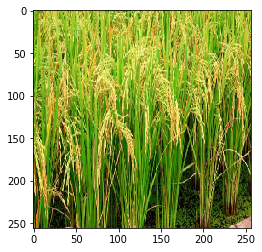

In [709]:
import numpy as np
n = 101
x = model.predict(np.reshape(X_train[n],(-1,256,256,3)))
plt.imshow(X_train[n])
print(np.argmax(x))
x

In [669]:
X_test.shape

(16, 256, 256, 3)

array([1., 0.], dtype=float32)

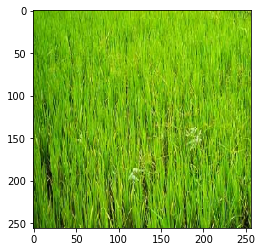

In [473]:

plt.imshow(X_test[n])
y_test[n]

In [ ]:
xt = model.predict(X_test)
p_true = []
for i in range(0,len(xt)):
    p_true.append(np.argmax(xt[i]))

In [ ]:
p_true.count(0)

In [ ]:
59/87

In [ ]:
n=117
print(model.predict(np.reshape(X[n],(-1,256,256,3))))
plt.imshow(X[n])

In [ ]:
pred = model.predict(X)


In [ ]:
def func(x):
    if x>0.5:
        return 1
    else:
        return 0

In [ ]:
for i in range(0,200):
    if pred[i]>0.5:
        pred[i] = 1
    else:
        pred[i] = 0

In [ ]:
pred

In [ ]:
y

In [ ]:
type(y)

In [ ]:
z = []
z = pred

In [ ]:
type(z)

In [ ]:
pred = list(pred)

In [ ]:
pred[4][0]

In [ ]:
p= []
for x in range(0,200):
    p.append(int(pred[x][0]))
    

In [ ]:
type(p)

In [ ]:
p

In [ ]:
import sklearn.metrics as metrics

confusion_matrix = metrics.confusion_matrix(y_true=y, y_pred=p)

In [ ]:
confusion_matrix

In [ ]:
(119 + 53)/200

In [ ]:

recall = precision = confusion_matrix[1][1] / (confusion_matrix[1][0] + confusion_matrix[1][1])

In [ ]:
precision = confusion_matrix[1][1] / (confusion_matrix[0][1] + confusion_matrix[1][1])

In [ ]:
confusion_matrix[1][1] + confusion_matrix[1][1]

In [ ]:
print(precision)
print(recall)

In [ ]:
F1 = 2 * (precision*recall)/(precision+recall)

In [ ]:
F1

In [ ]:
76/77

In [ ]:
a = precision

In [ ]:
b = recall

In [ ]:
F1 = 2 * (precision*recall)/(precision+recall)

In [ ]:
F1

In [ ]:
2 * (precision*recal)/(precision+recall)

In [ ]:
(a*b)/(a+b)

In [ ]:
a

In [ ]:
b

In [ ]:
(118+76)/200

In [ ]:
import cv2,os
img_array=[]

path = "/Users/ram/Documents/Project/Data/2/40.jpg"
img_array = cv2.imread(path)
img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)# convert to array
new_array = cv2.resize(img_array, (256, 256))

In [ ]:
model.predict(np.reshape(new_array,(-1,256,256,3)))

In [ ]:
plt.imshow(new_array)

In [710]:
model.save("model_4_and_5.h5")

In [480]:
from keras import models

In [505]:
from keras.models import load_model

model = load_model("model_2_and_5.h5")